In [1]:
## Open the nohup.log time and read its contents
with open('nohup.log', 'r') as file:
    nohup_log = file.read()


## Sample line from the nohup.file is: 
    # Iter 0    - time: 3     - [train] loss: 1.246  (+/-0.219 ) - [valid] loss: 1.1839 (+/-0.2074) - [test] loss: 1.5598 (+/-0.5549)


## Use regex to extract the following: itern, train_loss valied_loss, and test_loss
import re

# Define the regex pattern
# pattern = r'Iter (\d+)\s+- time: \d+\s+- \[train\] loss: (\d+\.\d+)\s+\(\+\/-(\d+\.\d+)\)\s+- \[valid\] loss: (\d+\.\d+)\s+\(\+\/-(\d+\.\d+)\)\s+- \[test\] loss: (\d+\.\d+)\s+\(\+\/-(\d+\.\d+)\)'

## New patter fater the confidences were removed
pattern = r'Iter (\d+)\s+- time: \d+\s+- \[train\] loss: (\d+\.\d+)\s+- \[valid\] loss: (\d+\.\d+)\s+- \[test\] loss: (\d+\.\d+)'


# Find all the matches
matches = re.findall(pattern, nohup_log)

# Display the first 5 matches
matches[:5]


## Place the matches in a pandas dataframe
import pandas as pd

# Create a dataframe from the matches
# df = pd.DataFrame(matches, columns=['iter', 'train_loss', 'train_conf', 'valid_loss', 'valid_conf', 'test_loss', 'test_conf'])

## New dataframe after the confidences were removed
df = pd.DataFrame(matches, columns=['iter', 'train_loss', 'valid_loss', 'test_loss'])

## Convert the columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')


# Display the first 5 rows of the dataframe
df.head()
df.dtypes

iter            int64
train_loss    float64
valid_loss    float64
test_loss     float64
dtype: object

Text(0.5, 1.0, 'Train, Valid, and Test Loss')

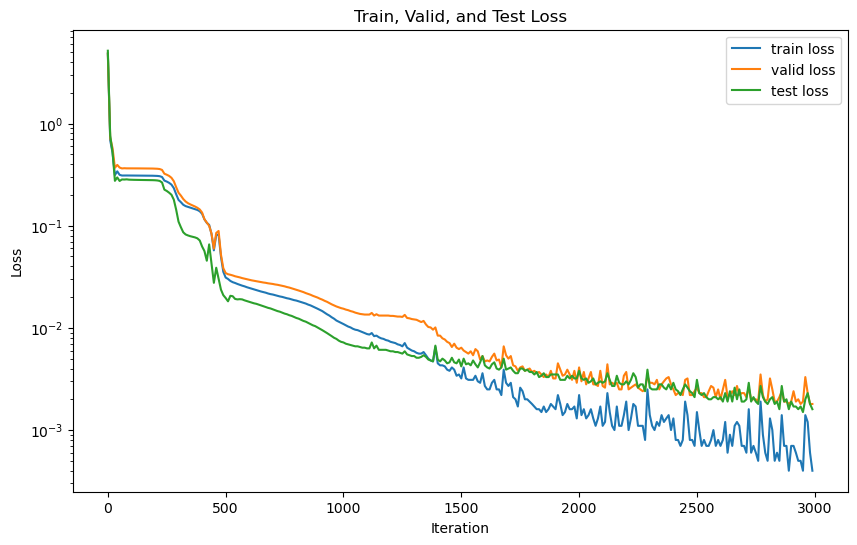

In [2]:
## Plot the train, valid, and test loss
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))
plt.plot(df['iter'], df['train_loss'], label='train loss')
plt.plot(df['iter'], df['valid_loss'], label='valid loss')
plt.plot(df['iter'], df['test_loss'], label='test loss')
plt.xlabel('Iteration')

plt.legend()

plt.yscale('log')
plt.ylabel('Loss')
plt.title('Train, Valid, and Test Loss')